# ESC-Trop

Creation date: 2020-11-24

Initial authors: Axel Nyström & Anders Björkelund

Commit to use: __insert__ __commit-sha__ __here__ in repository __repo__


## Summary
- Conditions, prerequisites and method
- Key findings
- Recommendations, next thing to do

## Purpose
This is a template to copy and use the good parts of.

## Introduction


## Method


## Imports 

In [2]:
import sys
sys.path.append('..')
import glob

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import h5py
import ecg_plot

from mim.massage.carlson_ecg import ECGStatus

#this is only for not seeing any warnings in the pdf
import warnings
warnings.filterwarnings('ignore')

paths = list(sorted(glob.iglob(
    '/mnt/air-crypt/air-crypt-raw/andersb/data/ESC_Trop_17-18-2020-09-21/data/*.csv')))

In [4]:
[path.split('/')[-1] for path in paths]

['ESC_TROP_AllaBesöksOrsakerVidÅterbesökInom30DagarEfter_InkluderadeIndexBesök_2017_2018.csv',
 'ESC_TROP_AllaBesöksOrsakerVidÅterinläggningInom30DagarEfter_InkluderadeIndexBesök_2017_2018.csv',
 'ESC_TROP_Diagnoser_EfterInkluderadeIndexBesök_2017_2018.csv',
 'ESC_TROP_Diagnoser_FöreInkluderadeIndexBesök_2017_2018.csv',
 'ESC_TROP_Diagnoser_InkluderadeIndexBesök_2017_2018.csv',
 'ESC_TROP_LabAnalysSvar_InkluderadeIndexBesök_2017_2018.csv',
 'ESC_TROP_PatientÅtgärder_Efter_InkluderadeIndexBesök_2017_2018.csv',
 'ESC_TROP_PatientÅtgärder_InkluderadeIndexBesök_2017_2018.csv',
 'ESC_TROP_SJUKVARDSKOSTNADER_101_uttag_ÖV.csv',
 'ESC_TROP_SJUKVARDSKOSTNADER_102_uttag_SV.csv',
 'ESC_TROP_SOS_R_DORS__14204_2019.csv',
 'ESC_TROP_SVAR-data 17-18, hela Skåne, bara brsm, till ESC-TROP.csv',
 'ESC_TROP_SWEDEHEART_DAT221_ctangio_pop1.csv',
 'ESC_TROP_SWEDEHEART_DAT221_ctfinding_pop1.csv',
 'ESC_TROP_SWEDEHEART_DAT221_hsurg_pop1.csv',
 'ESC_TROP_SWEDEHEART_DAT221_rikshia_pop1.csv',
 'ESC_TROP_SWEDEHEA

# Tables

## Index-besök
File: ```ESC_TROP_Vårdkontakt_InkluderadeIndexBesök_2017_2018.csv```

In [6]:
paths[-8]

'/mnt/air-crypt/air-crypt-raw/andersb/data/ESC_Trop_17-18-2020-09-21/data/ESC_TROP_Vårdkontakt_InkluderadeIndexBesök_2017_2018.csv'

In [5]:
def read_csv(path):
    return pd.read_csv(path, encoding='latin1', sep='|')

In [85]:
index_visits = read_csv(paths[-8])
revisits = read_csv(paths[0])
readmissions = read_csv(paths[1])

In [89]:
diagnoses_after = read_csv(paths[2])
diagnoses_before = read_csv(paths[3])
diagnoses_current = read_csv(paths[4])

In [11]:
index_visits

,KontaktId,Alias,VardtillfalleAlias,Process_text,UppföljningParameter_text,AktuellSjukhusId,Sjukhus_KortNamn,Sjukhus_Namn,BesokOrsakId,BesokOrsak_Kod,...,Återinläggning inom 30 dagar besöksorsak Bröstsmärta,Återbesök inom 30 dagar samtliga besöksorsaker,Återinläggning inom 30 dagar samtliga besöksorsaker,MACE inom 30 dagar,Charlson comorbidity index,Avliden,Dödsdatum,DödsdatumSomSträng,RiksHIA_STEMI,RiksHIA_Admission_ER_DATE_TIME
0,K10000954,{586053FF-5A95-481B-BF6B-EBBB61DD143C},NaN,Team 3,NaN,O10001,SUSLu,SUS Lund,120.0,BröstSm,...,False,False,False,False,NaN,False,NaN,NaN,False,NaN
1,K10012047,{4DD8625B-B42F-4F0B-8A1A-1D0F5B1DE351},NaN,Team 3,NaN,O10001,SUSLu,SUS Lund,120.0,BröstSm,...,False,False,False,False,NaN,False,NaN,NaN,False,NaN
2,K10001696,{EA169D3B-5936-4213-AEBE-C667A7226BEB},NaN,Team 2,Ambulans,O10001,SUSLu,SUS Lund,120.0,BröstSm,...,False,False,False,False,NaN,False,NaN,NaN,False,NaN
3,K10000699,{84754918-6555-45CA-8711-EB330313072D},NaN,Team 3,Ambulans,O10001,SUSLu,SUS Lund,120.0,BröstSm,...,False,False,False,False,NaN,False,NaN,NaN,False,NaN
4,K10008590,{397D2E62-E62C-4F80-B5A8-3FFA5742B004},NaN,NaN,NaN,SE162321000255-O12014,HBG,Helsingborgs lasarett,120.0,BröstSm,...,False,False,False,False,NaN,False,NaN,NaN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27554,K10027532,{264DBF59-2102-41C4-B772-BC127403B5F2},VT0025645,Team 2,NaN,O10001,SUSLu,SUS Lund,120.0,BröstSm,...,False,False,False,False,3.0,False,NaN,NaN,False,NaN
27555,K10027533,{B02185E0-6E15-4C0E-A72E-6D3AB83885A5},VT0006244,-,1 h TNT,SE162321000255-O12014,HBG,Helsingborgs lasarett,120.0,BröstSm,...,False,False,False,False,1.0,False,NaN,NaN,False,NaN
27556,K10027548,{719C1657-539A-463E-940B-BD2985B36B04},VT0026677,Team 3 SÄ,Ambulans,O10001,SUSLu,SUS Lund,120.0,BröstSm,...,False,False,False,False,3.0,False,NaN,NaN,False,NaN
27557,K10027545,{CABAFB83-2ECA-4972-B6D5-ACCAD10CEDA1},VT0007190,-,1 h TNT,SE162321000255-O12014,HBG,Helsingborgs lasarett,120.0,BröstSm,...,False,False,False,False,1.0,False,NaN,NaN,False,NaN


In [12]:
index_visits.columns

Index(['KontaktId', 'Alias', 'VardtillfalleAlias', 'Process_text',
       'UppföljningParameter_text', 'AktuellSjukhusId', 'Sjukhus_KortNamn',
       'Sjukhus_Namn', 'BesokOrsakId', 'BesokOrsak_Kod',
       'BesokOrsak_Beskrivning', 'Vardkontakt_InskrivningDatum',
       'Vardkontakt_UtskrivningDatum', 'Vårddtid på akuten i minuter',
       'Tid på CDU i minuter', 'Total vårdtid i minuter',
       'Tid till läkare på akuten i minuter',
       'Första läkarkontakten på akuten', 'Ålder vid inklusion', 'Kön',
       'Utskriven till', 'Inläggningsavdelning', 'Avvikit mot rekommendation',
       'Inlagd', 'Återbesök inom 30 dagar besöksorsak Bröstsmärta',
       'Återinläggning inom 30 dagar besöksorsak Bröstsmärta',
       'Återbesök inom 30 dagar samtliga besöksorsaker',
       'Återinläggning inom 30 dagar samtliga besöksorsaker',
       'MACE inom 30 dagar', 'Charlson comorbidity index', 'Avliden',
       'Dödsdatum', 'DödsdatumSomSträng', 'RiksHIA_STEMI',
       'RiksHIA_Admission_ER_D

In [13]:
index_visits.dtypes

KontaktId                                                object
Alias                                                    object
VardtillfalleAlias                                       object
Process_text                                             object
UppföljningParameter_text                                object
AktuellSjukhusId                                         object
Sjukhus_KortNamn                                         object
Sjukhus_Namn                                             object
BesokOrsakId                                            float64
BesokOrsak_Kod                                           object
BesokOrsak_Beskrivning                                   object
Vardkontakt_InskrivningDatum                             object
Vardkontakt_UtskrivningDatum                             object
Vårddtid på akuten i minuter                              int64
Tid på CDU i minuter                                    float64
Total vårdtid i minuter                 

In [15]:
index_visits[index_visits.Avliden]

,KontaktId,Alias,VardtillfalleAlias,Process_text,UppföljningParameter_text,AktuellSjukhusId,Sjukhus_KortNamn,Sjukhus_Namn,BesokOrsakId,BesokOrsak_Kod,...,Återinläggning inom 30 dagar besöksorsak Bröstsmärta,Återbesök inom 30 dagar samtliga besöksorsaker,Återinläggning inom 30 dagar samtliga besöksorsaker,MACE inom 30 dagar,Charlson comorbidity index,Avliden,Dödsdatum,DödsdatumSomSträng,RiksHIA_STEMI,RiksHIA_Admission_ER_DATE_TIME
15,K10005877,{B07A193F-216C-447F-AE0A-91A0EDF9A470},NaN,Ankomst,Ambulans,SE162321000255-O11414,SUSMa,SUS Malmö,120.0,BröstSm,...,False,False,False,False,NaN,True,2018-09-07 00:00:00.0000000,2018/09/07,False,NaN
44,K10000031,{491A752E-81C4-4720-B6EA-EF2247776DDC},VT0006949,-,Ambulans,SE162321000255-O16571,YL,Ystads lasarett,120.0,BröstSm,...,False,False,False,False,3.0,True,2019-07-31 00:00:00.0000000,2019/07/31,False,NaN
64,K10000105,{53002A70-0835-4DC8-B1DE-B1CDFA2065F6},VT0024865,LARM,Ambulans,O10001,SUSLu,SUS Lund,120.0,BröstSm,...,False,False,False,True,2.0,True,2017-06-24 00:00:00.0000000,2017/06/24,False,NaN
66,K10000113,{B3D99F9C-8C24-4185-A06D-B2AB839328FD},VT0012837,Triage,Ambulans,SE162321000255-O11414,SUSMa,SUS Malmö,120.0,BröstSm,...,False,False,False,True,1.0,True,2018-01-04 00:00:00.0000000,2018/01/04,False,NaN
76,K10000171,{2345E171-F6D7-42B6-A32E-89443CF8DA3D},VT0019291,-,Ambulans,SE162321000255-O16571,YL,Ystads lasarett,120.0,BröstSm,...,False,False,False,False,1.0,True,2017-02-04 00:00:00.0000000,2017/02/04,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27478,K10027258,{8DC1AAD6-7943-46B7-B345-C077DB5A45D5},VT0025888,Triage,Ambulans,SE162321000255-O11414,SUSMa,SUS Malmö,120.0,BröstSm,...,False,False,False,True,8.0,True,2019-06-20 00:00:00.0000000,2019/06/20,False,NaN
27503,K10027363,{1E77D87D-0FCE-4A5A-961D-ADA59680C5BD},VT0007971,Team 3,NaN,O10001,SUSLu,SUS Lund,120.0,BröstSm,...,False,True,False,False,8.0,True,2019-06-08 00:00:00.0000000,2019/06/08,False,NaN
27506,K10027380,{8540C9AB-0CFD-435D-93CA-3FDAFD9FE2EA},VT0016665,Team 3,Ambulans,O10001,SUSLu,SUS Lund,120.0,BröstSm,...,False,False,False,False,NaN,True,2019-05-07 00:00:00.0000000,2019/05/07,False,NaN
27507,K10027377,{F3C1CE59-23D3-4CFD-BED3-BE9F767A400D},VT0025100,-,NaN,SE162321000255-O12014,HBG,Helsingborgs lasarett,120.0,BröstSm,...,False,True,False,True,2.0,True,2019-08-28 00:00:00.0000000,2019/08/28,True,2018-11-26 21:07:00


<AxesSubplot:>

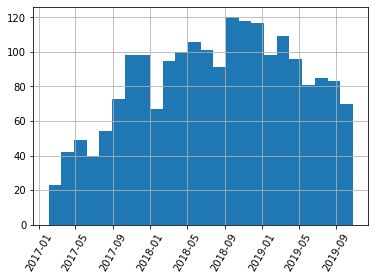

In [58]:
plt.xticks(rotation=60)
pd.to_datetime(index_visits['Dödsdatum'].dropna()).hist(bins=24)

In [17]:
index_visits.Dödsdatum

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
27554    NaN
27555    NaN
27556    NaN
27557    NaN
27558    NaN
Name: Dödsdatum, Length: 27559, dtype: object

In [23]:
deaths_alias = set(index_visits.loc[index_visits.Avliden, 'Alias'].unique())
deaths_dates = set(index_visits.set_index('Alias').Dödsdatum.dropna().index.unique())

print(
    len(deaths_alias),
    len(deaths_dates),
    len(deaths_alias | deaths_dates),
    len(deaths_alias & deaths_dates)
)
print(
    index_visits.Avliden.sum(),
    len(index_visits.Dödsdatum.dropna())
)

2066 2012 2066 2012
2068 2014


In [59]:
index_visits.Vardkontakt_InskrivningDatum

0        2017-02-18 19:24:00.0000000
1        2017-10-10 20:30:00.0000000
2        2017-03-03 02:26:00.0000000
3        2017-02-13 18:22:00.0000000
4        2017-07-26 15:07:00.0000000
                    ...             
27554    2018-11-30 11:32:00.0000000
27555    2018-11-30 11:38:00.0000000
27556    2018-11-30 19:50:00.0000000
27557    2018-11-30 18:08:00.0000000
27558    2018-11-30 23:11:00.0000000
Name: Vardkontakt_InskrivningDatum, Length: 27559, dtype: object

In [61]:
index_visits['Utskriven till'].value_counts()

Hemmet                  18549
Avdelning                8365
Sjukhus                   434
Avslutad                   86
Mottagning                 61
Avvikit efter läkbed       32
Avliden                    21
Primärvård                 11
Name: Utskriven till, dtype: int64

### Besöksorsaker

In [31]:
cols = ['BesokOrsakId', 'BesokOrsak_Kod', 'BesokOrsak_Beskrivning', 'Sjukhus_KortNamn', 'Sjukhus_Namn', 'AktuellSjukhusId']
index_visits[cols].drop_duplicates()

,BesokOrsakId,BesokOrsak_Kod,BesokOrsak_Beskrivning,Sjukhus_KortNamn,Sjukhus_Namn,AktuellSjukhusId
0,120.0,BröstSm,"Bröstsmärta/Bröstkorgssmärta UNS RETTS-A 5, Re...",SUSLu,SUS Lund,O10001
4,120.0,BröstSm,"Bröstsmärta/Bröstkorgssmärta UNS RETTS-A 5, Re...",HBG,Helsingborgs lasarett,SE162321000255-O12014
8,120.0,BröstSm,"Bröstsmärta/Bröstkorgssmärta UNS RETTS-A 5, Re...",SUSMa,SUS Malmö,SE162321000255-O11414
11,120.0,BröstSm,"Bröstsmärta/Bröstkorgssmärta UNS RETTS-A 5, Re...",CSK,Centralsjukhuset Kristianstad,SE162321000255-O10532
24,NaN,NaN,NaN,NaN,NaN,NaN
44,120.0,BröstSm,"Bröstsmärta/Bröstkorgssmärta UNS RETTS-A 5, Re...",YL,Ystads lasarett,SE162321000255-O16571


In [32]:
len(index_visits[cols]) - len(index_visits[cols].dropna(how='all'))

1010

In [33]:
len(index_visits)

27559

In [34]:
len(index_visits.Alias.unique())

27557

In [35]:
kompletterande = read_csv('/mnt/air-crypt/air-crypt-raw/andersb/data/ESC_TROP_KompletterandeBesöksorsakerFör_Vårdkontakt_InkluderadeIndexBesök_2017_2018.csv')

In [36]:
kompletterande

,KontaktId,BesokOrsakId,BesokOrsak_Kod,BesokOrsak_Beskrivning
0,K10000037,344,BröstrySm,Smärtor i bröstryggen RETTS-A 14
1,K10000067,399,BröstkorgSm,"Bröstsmärta/Bröstkorgsmärta RETTS-A 5, RETTS-P..."
2,K10000077,239,AndnSm,"Bröstsmärta vid andning RETTS-A 4,RETTS-P 104"
3,K10000129,399,BröstkorgSm,"Bröstsmärta/Bröstkorgsmärta RETTS-A 5, RETTS-P..."
4,K10000131,399,BröstkorgSm,"Bröstsmärta/Bröstkorgsmärta RETTS-A 5, RETTS-P..."
...,...,...,...,...
1013,K10027382,344,BröstrySm,Smärtor i bröstryggen RETTS-A 14
1014,K10027415,344,BröstrySm,Smärtor i bröstryggen RETTS-A 14
1015,K10027509,399,BröstkorgSm,"Bröstsmärta/Bröstkorgsmärta RETTS-A 5, RETTS-P..."
1016,K10027522,399,BröstkorgSm,"Bröstsmärta/Bröstkorgsmärta RETTS-A 5, RETTS-P..."


In [38]:
index_visits.Sjukhus_KortNamn.value_counts()

SUSMa    7445
SUSLu    6960
HBG      5498
CSK      4099
YL       2547
Name: Sjukhus_KortNamn, dtype: int64

## Labanalyssvar
File: ESC_TROP_LabAnalysSvar_InkluderadeIndexBesök_2017_2018

In [62]:
lab = read_csv(paths[5])

In [63]:
lab.dtypes

KontaktId                       object
Alias                           object
Analyssvar_ProvtagningDatum     object
Analyssvar_MottagetDatum        object
Labanalys_Beskrivning           object
Labanalys_Namn                  object
Analyssvar_Varde                object
Analyssvar_Enhet                object
Analyssvar_ReferensvardeMin    float64
Analyssvar_ReferensvardeMax    float64
dtype: object

In [67]:
lab

,KontaktId,Alias,Analyssvar_ProvtagningDatum,Analyssvar_MottagetDatum,Labanalys_Beskrivning,Labanalys_Namn,Analyssvar_Varde,Analyssvar_Enhet,Analyssvar_ReferensvardeMin,Analyssvar_ReferensvardeMax
0,K10003496,{16B4F935-A85A-4E58-B09C-B8DD318FCEA5},2017-04-06 11:50:00.0000000,2017-04-06 12:04:14.0000000,P-Anjongap (exkl K+),P-Anjongap,9,mmol/L,6.00,10.0
1,K10003496,{16B4F935-A85A-4E58-B09C-B8DD318FCEA5},2017-04-06 11:50:00.0000000,2017-04-06 12:04:14.0000000,vB-pO2 (37°C),vB-pO2 (37,2.7,kPa,NaN,NaN
2,K10022004,{6A0D6809-58F5-45AA-8844-D7B9BEFA928A},2018-07-22 23:10:00.0000000,2018-07-23 00:24:00.0000000,P-CRP,P-CRP,3.4,mg/L,NaN,3.0
3,K10022004,{6A0D6809-58F5-45AA-8844-D7B9BEFA928A},2018-07-22 23:10:00.0000000,2018-07-23 00:28:01.0000000,P-ASAT,P-ASAT,HEMOL,µkat/L,0.25,0.6
4,K10022004,{6A0D6809-58F5-45AA-8844-D7B9BEFA928A},2018-07-22 23:40:00.0000000,2018-07-22 23:54:00.0000000,P-Anjongap (exkl K+),P-Anjongap,12,mmol/L,6.00,10.0
...,...,...,...,...,...,...,...,...,...,...
601758,K10027517,{3873F6DE-4850-4D9B-B038-B5583CB1C245},2018-11-30 00:30:00.0000000,2018-11-30 00:34:02.0000000,P-Standardbikarbonat,P-Standard,25,mmol/L,22.00,27.0
601759,K10027524,{C15A0B92-0613-4524-86B5-C86C5EBB6693},2018-11-30 06:40:00.0000000,2018-11-30 06:46:05.0000000,P-Natrium,P-Natrium,142,mmol/L,137.00,145.0
601760,K10027524,{C15A0B92-0613-4524-86B5-C86C5EBB6693},2018-11-30 06:40:00.0000000,2018-11-30 06:46:05.0000000,vB-Oxygenmättnad,vB-Oxygenm,73,%,NaN,NaN
601761,K10027524,{C15A0B92-0613-4524-86B5-C86C5EBB6693},2018-11-30 06:50:00.0000000,2018-11-30 07:46:01.0000000,P-Troponin T,P-Troponin,<5,ng/L,NaN,15.0


In [71]:
lab[lab.Labanalys_Namn.str.match('.*Troponin.*', case=False)].Labanalys_Beskrivning.value_counts()

P-Troponin T    41922
Name: Labanalys_Beskrivning, dtype: int64

In [89]:
#lab['value']
lab['value'] = np.nan
lab.loc[lab.Analyssvar_Varde.str.match('<5'), 'value'] = 4
lab['value']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
601758    NaN
601759    NaN
601760    NaN
601761    4.0
601762    NaN
Name: value, Length: 601763, dtype: float64

In [95]:
lab['value'] = lab['value'].fillna(pd.to_numeric(lab.Analyssvar_Varde, errors='coerce'))

In [108]:
num_troponin_values = lab.loc[lab.Labanalys_Namn.str.match('P-Troponin')].dropna(subset=['value'])['Alias'].value_counts()

In [111]:
lab = lab.join(num_troponin_values.rename('troponin_count'), on='Alias', how='left').fillna(0)

In [114]:
len(lab.loc[lab['troponin_count'] >= 2, 'Alias'].unique())

11661

<AxesSubplot:>

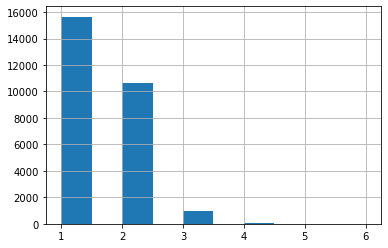

In [106]:
lab.loc[lab.Labanalys_Namn.str.match('P-Troponin')].dropna(subset=['value'])['Alias'].value_counts().hist()

In [102]:
lab

,KontaktId,Alias,Analyssvar_ProvtagningDatum,Analyssvar_MottagetDatum,Labanalys_Beskrivning,Labanalys_Namn,Analyssvar_Varde,Analyssvar_Enhet,Analyssvar_ReferensvardeMin,Analyssvar_ReferensvardeMax,value
0,K10003496,{16B4F935-A85A-4E58-B09C-B8DD318FCEA5},2017-04-06 11:50:00.0000000,2017-04-06 12:04:14.0000000,P-Anjongap (exkl K+),P-Anjongap,9,mmol/L,6.00,10.0,9.0
1,K10003496,{16B4F935-A85A-4E58-B09C-B8DD318FCEA5},2017-04-06 11:50:00.0000000,2017-04-06 12:04:14.0000000,vB-pO2 (37°C),vB-pO2 (37,2.7,kPa,NaN,NaN,2.7
2,K10022004,{6A0D6809-58F5-45AA-8844-D7B9BEFA928A},2018-07-22 23:10:00.0000000,2018-07-23 00:24:00.0000000,P-CRP,P-CRP,3.4,mg/L,NaN,3.0,3.4
3,K10022004,{6A0D6809-58F5-45AA-8844-D7B9BEFA928A},2018-07-22 23:10:00.0000000,2018-07-23 00:28:01.0000000,P-ASAT,P-ASAT,HEMOL,µkat/L,0.25,0.6,NaN
4,K10022004,{6A0D6809-58F5-45AA-8844-D7B9BEFA928A},2018-07-22 23:40:00.0000000,2018-07-22 23:54:00.0000000,P-Anjongap (exkl K+),P-Anjongap,12,mmol/L,6.00,10.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
601758,K10027517,{3873F6DE-4850-4D9B-B038-B5583CB1C245},2018-11-30 00:30:00.0000000,2018-11-30 00:34:02.0000000,P-Standardbikarbonat,P-Standard,25,mmol/L,22.00,27.0,25.0
601759,K10027524,{C15A0B92-0613-4524-86B5-C86C5EBB6693},2018-11-30 06:40:00.0000000,2018-11-30 06:46:05.0000000,P-Natrium,P-Natrium,142,mmol/L,137.00,145.0,142.0
601760,K10027524,{C15A0B92-0613-4524-86B5-C86C5EBB6693},2018-11-30 06:40:00.0000000,2018-11-30 06:46:05.0000000,vB-Oxygenmättnad,vB-Oxygenm,73,%,NaN,NaN,73.0
601761,K10027524,{C15A0B92-0613-4524-86B5-C86C5EBB6693},2018-11-30 06:50:00.0000000,2018-11-30 07:46:01.0000000,P-Troponin T,P-Troponin,<5,ng/L,NaN,15.0,4.0


In [78]:
foo = lab[lab.Labanalys_Namn.str.match('.*Troponin.*', case=False)]
foo[foo.Analyssvar_Varde.str.match('[^0-9]')].Analyssvar_Varde.value_counts()

<5       12558
KOMM      1806
FELTA       23
SAKNA        9
HEMOL        2
.....        1
Name: Analyssvar_Varde, dtype: int64

In [97]:
foo

,KontaktId,Alias,Analyssvar_ProvtagningDatum,Analyssvar_MottagetDatum,Labanalys_Beskrivning,Labanalys_Namn,Analyssvar_Varde,Analyssvar_Enhet,Analyssvar_ReferensvardeMin,Analyssvar_ReferensvardeMax
25,K10021557,{9091796B-7D63-4D21-9462-8D8AC403B2B5},2018-07-09 21:50:00.0000000,2018-07-09 22:40:02.0000000,P-Troponin T,P-Troponin,<5,ng/L,NaN,15.0
29,K10008182,{AE1BC720-A157-4D6B-B6C3-2BC9684B527B},2017-07-17 20:00:00.0000000,2017-07-17 21:04:02.0000000,P-Troponin T,P-Troponin,13,ng/L,NaN,15.0
38,K10005999,{8D13015C-B100-4E8F-9694-8FB42E2AFEF8},2017-05-28 19:00:00.0000000,2017-05-28 19:54:03.0000000,P-Troponin T,P-Troponin,<5,ng/L,NaN,15.0
59,K10022004,{6A0D6809-58F5-45AA-8844-D7B9BEFA928A},2018-07-22 23:10:00.0000000,2018-07-23 00:30:01.0000000,P-Troponin T,P-Troponin,KOMM,ng/L,NaN,NaN
64,K10000225,{C7E576A0-6DD5-49EE-994D-86075D8EC66A},2017-02-04 15:30:00.0000000,2017-02-04 16:22:07.0000000,P-Troponin T,P-Troponin,<5,ng/L,NaN,15.0
...,...,...,...,...,...,...,...,...,...,...
601704,K10027255,{53460095-F57D-4F27-B478-C68FEBB459BB},2018-11-22 20:00:00.0000000,2018-11-22 21:08:01.0000000,P-Troponin T,P-Troponin,7,ng/L,NaN,15.0
601718,K10027285,{DB198F6D-8D6D-4C87-AFF4-4BBF286F7CAB},2018-11-23 23:00:00.0000000,2018-11-23 23:50:00.0000000,P-Troponin T,P-Troponin,9,ng/L,NaN,15.0
601722,K10027291,{68C51D8A-E8D9-4393-83A0-8F1DBBD0AD31},2018-11-24 06:00:00.0000000,2018-11-24 06:50:05.0000000,P-Troponin T,P-Troponin,19,ng/L,NaN,15.0
601744,K10027430,{82DDEC30-D8DF-48B7-8E52-86361F989C28},2018-11-27 21:20:00.0000000,2018-11-27 22:08:00.0000000,P-Troponin T,P-Troponin,<5,ng/L,NaN,15.0


In [64]:
len(lab)

601763

In [66]:
len(lab.Alias.unique())

27557

## Patients


In [115]:
lund_paths = list(sorted(glob.iglob(
    '/mnt/air-crypt/air-crypt-expect/andersb/data/Expect-Lund-2019-09-23/Strukturerad data/*.csv')))
hbg_paths = list(sorted(glob.iglob(
    '/mnt/air-crypt/air-crypt-expect/andersb/data/Expect-HBG-2019-12-04/csv_filer/*.csv')))

lu_ed = read_csv(lund_paths[4])
lu_patients = pd.DataFrame(lu_ed.Alias.drop_duplicates()).set_index('Alias')
lu_patients['Lund'] = True

hbg_ed = read_csv(hbg_paths[1])
hbg_patients = pd.DataFrame(hbg_ed.Alias.drop_duplicates()).set_index('Alias')
hbg_patients['Helsingborg'] = True

patients = lu_patients.join(hbg_patients, how='outer').fillna(False)

In [116]:
lu_demografi = read_csv(lund_paths[1])
#lu_birthyear = lu_demografi.dropna(subset=['Alias']).set_index('Alias').foedaar.rename('birthyear')
#lu_birthyear
lu_demografi = (
    lu_demografi
    .dropna(subset=['Alias'])
    .set_index('Alias')[['foedaar', 'kon']]
    .rename(columns={'foedaar': 'birthyear', 'kon': 'sex'})
)

In [117]:
hbg_demografi = read_csv(hbg_paths[2])
hbg_demografi = (
    hbg_demografi.dropna(subset=['Alias', 'fdag'], how='any')
    .set_index('Alias')[['fdag', 'kon']]
    .rename(columns={'fdag': 'birthyear', 'kon': 'sex'})
)
hbg_demografi.birthyear = pd.to_datetime(hbg_demografi.birthyear, format="%d%b%Y").dt.strftime("%Y").astype(int)
hbg_demografi

,birthyear,sex
Alias,,
{27B71380-F1B8-4DAD-B9C9-D16EB71B23DA},1966,1.0
{046C6BA3-914D-4A3D-BE51-40A375CECACA},1935,1.0
{9827D0B4-AFAC-4D06-9BCF-A3610B8486C2},1916,1.0
{746396ED-6F99-494D-9D02-F7C549038566},1968,0.0
{CBAC2A20-A57A-4B2F-A40D-C728CA749CF3},1920,1.0
...,...,...
{A8C11BED-1C44-4189-A204-D829546947DD},1995,0.0
{7295FFB3-A294-4FD5-BF1F-7D1BC4AFD67E},1995,0.0
{CA190E67-8267-4E3A-8B30-918DD233D3C3},1995,1.0


In [118]:
patients = patients.join(lu_demografi, how='left').fillna(hbg_demografi)
patients

,Lund,Helsingborg,birthyear,sex
Alias,,,,
{000090D0-D4D2-4C93-B3DF-21BDD488C63A},True,False,1943.0,0.0
{0000DC49-AE86-4F86-9C3F-12F19F135FBE},True,False,1947.0,0.0
{0000EC99-5DD2-49B2-85BD-79DDD8C093D9},False,True,1991.0,1.0
{0000F3B6-DBD2-4A9B-BF13-AB782407A5B9},True,False,1965.0,1.0
{0001926B-39C8-4E1C-AC3D-D7DE67DDC25E},True,False,1976.0,1.0
...,...,...,...,...
{FFFEE8B9-9FA2-420B-88EF-756E1F8559FC},False,True,1960.0,1.0
{FFFF226F-CDAC-4595-937D-8CEE396BC6D4},True,False,1925.0,0.0
{FFFF8D86-1396-4A70-A908-C50786840CAF},True,False,1967.0,0.0


In [121]:
esc_trop_patients = set(index_visits.Alias.unique())
expect_patients = set(patients.index.unique())

In [122]:
print(
    len(esc_trop_patients),
    len(expect_patients),
    len(esc_trop_patients & expect_patients)
)

27557 197601 7209


# ECG

In [7]:
ecg_path = '/mnt/air-crypt/air-crypt-esc-trop/axel/ecg.hdf5'
ecg = h5py.File(ecg_path, 'r')

In [8]:
list(ecg)

['beat', 'meta', 'raw']

## Meta data
The ECG files contain a bunch of metadata which I have automatically analyzed in search for potential problems. Here I will look primarily at the frequencies with which the different problems occur.

In [9]:
ecg['meta'].keys()

<KeysViewHDF5 ['alias', 'date', 'device', 'lead_system', 'path', 'status', 'status_keys']>

In [104]:
pd.Series(ecg['meta']['lead_system'][:]).value_counts()

12-lead ECG    536135
dtype: int64

In [105]:
pd.Series(ecg['meta']['device'][:]).value_counts()

MAC55             195493
MAC5K              72652
LP15-              51640
ECStore            45428
MAC                32179
D3K                30437
Datam              24385
CASE               22342
MUSE               19277
MAC35              18770
MACVU              13049
MAC 8               3252
Unknown device      2871
M1200               2260
MAC V               1644
CSYS                 226
LP15G                136
MAC80                 93
MAC2K                  1
dtype: int64

In [10]:
ecg['meta']['status_keys'][:]

array(['MISSING_DATA', 'MISSING_LABELS', 'MISSING_ECG', 'MISSING_BEAT',
       'MISSING_RHYTHM', 'MISSING_DIAGNOSES', 'MISSING_SUMMARY',
       'MISSING_MEASUREMENTS', 'TECHNICAL_ERROR', 'BAD_DIAGNOSIS',
       'FILE_MISSING', 'BAD_ECG_DIMENSIONS', 'BAD_BEAT_DIMENSIONS',
       'EMPTY_ECG_ROWS', 'EMPTY_ECG_COLUMNS', 'EMPTY_BEAT_ROWS',
       'EMPTY_BEAT_COLUMNS', 'MISSING_RECORDING', 'MISSING_FILE_FORMAT',
       'MISSING_ID', 'MISSING_DATE', 'MISSING_DEVICE',
       'MISSING_LEAD_SYSTEM', 'BAD_DATE', 'MISSING_PATIENT'], dtype=object)

In [11]:
important_status_labels = {
    ECGStatus.MISSING_DATA, 
    ECGStatus.MISSING_LABELS,
    ECGStatus.MISSING_ECG,
    ECGStatus.MISSING_BEAT,
    ECGStatus.MISSING_RHYTHM,
    ECGStatus.TECHNICAL_ERROR,
    ECGStatus.BAD_DIAGNOSIS,
    ECGStatus.FILE_MISSING,
    ECGStatus.BAD_ECG_DIMENSIONS,
    ECGStatus.BAD_BEAT_DIMENSIONS,
    ECGStatus.EMPTY_ECG_ROWS,
    ECGStatus.EMPTY_ECG_COLUMNS,
    ECGStatus.EMPTY_BEAT_ROWS,
    ECGStatus.EMPTY_BEAT_COLUMNS,
    ECGStatus.MISSING_RECORDING,
    ECGStatus.MISSING_FILE_FORMAT,
    ECGStatus.MISSING_ID,
    ECGStatus.MISSING_DATE,
    ECGStatus.BAD_DATE,
    ECGStatus.MISSING_PATIENT
}

In [12]:
ecg_status = pd.DataFrame(
    ecg['meta']['status'][:],
    columns=ecg['meta']['status_keys'][:]
)

In [13]:
ecg_status.mean()

MISSING_DATA            0.000000
MISSING_LABELS          0.000000
MISSING_ECG             0.000000
MISSING_BEAT            0.000366
MISSING_RHYTHM          0.007006
MISSING_DIAGNOSES       0.231362
MISSING_SUMMARY         0.005991
MISSING_MEASUREMENTS    0.000000
TECHNICAL_ERROR         0.001037
BAD_DIAGNOSIS           0.063277
FILE_MISSING            0.000000
BAD_ECG_DIMENSIONS      0.000000
BAD_BEAT_DIMENSIONS     0.000000
EMPTY_ECG_ROWS          0.002490
EMPTY_ECG_COLUMNS       0.037006
EMPTY_BEAT_ROWS         0.017096
EMPTY_BEAT_COLUMNS      0.050280
MISSING_RECORDING       0.000000
MISSING_FILE_FORMAT     0.000000
MISSING_ID              0.000000
MISSING_DATE            0.000000
MISSING_DEVICE          0.005355
MISSING_LEAD_SYSTEM     0.000000
BAD_DATE                0.000000
MISSING_PATIENT         0.000000
dtype: float64

In [14]:
ecg_status.any(axis=1).mean()

0.301418486015649

In [15]:
ecg_status['ALL_OK'] = ~ecg_status.any(axis=1)
ecg_status['USABLE'] = ~ecg_status[list(map(lambda s: s.name, important_status_labels))].any(axis=1)
ecg_status

,MISSING_DATA,MISSING_LABELS,MISSING_ECG,MISSING_BEAT,MISSING_RHYTHM,MISSING_DIAGNOSES,MISSING_SUMMARY,MISSING_MEASUREMENTS,TECHNICAL_ERROR,BAD_DIAGNOSIS,...,MISSING_RECORDING,MISSING_FILE_FORMAT,MISSING_ID,MISSING_DATE,MISSING_DEVICE,MISSING_LEAD_SYSTEM,BAD_DATE,MISSING_PATIENT,ALL_OK,USABLE
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536130,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
536131,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
536132,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
536133,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True


In [16]:
ecg_date = pd.DataFrame(
    pd.to_datetime(ecg['meta']['date'][:], format="%Y-%m-%d %H:%M:%S"),
    columns=['date']
)

In [106]:
ecg_date.date.hist(bins=49)

<AxesSubplot:>

In [18]:
def yearly_frequency(dates):
    bins = pd.cut(
        dates.date, 
        bins=pd.date_range(start='1970', end='2020', freq='YS'),
        include_lowest=True,
        right=False
    )
    return bins.value_counts().sort_index()

In [19]:
freqs = pd.DataFrame(
    yearly_frequency(ecg_date).values,
    columns=['All'],
    index=range(1970, 2020)
)

In [20]:
freqs['USABLE'] = yearly_frequency(ecg_date[ecg_status.USABLE]).values
freqs['ALL_OK'] = yearly_frequency(ecg_date[ecg_status.ALL_OK]).values
freqs['MISSING_DIAGNOSES'] = yearly_frequency(ecg_date[ecg_status.MISSING_DIAGNOSES]).values
freqs['BAD_DIAGNOSIS'] = yearly_frequency(ecg_date[ecg_status.BAD_DIAGNOSIS]).values
freqs['TECHNICAL_ERROR'] = yearly_frequency(ecg_date[ecg_status.TECHNICAL_ERROR]).values
freqs['EMPTY_ECG_ROWS'] = yearly_frequency(ecg_date[ecg_status.EMPTY_ECG_ROWS]).values
freqs['EMPTY_ECG_COLUMNS'] = yearly_frequency(ecg_date[ecg_status.EMPTY_ECG_COLUMNS]).values

In [21]:
freqs_percent = freqs.divide(freqs.All, axis='rows')
freqs_percent.All = freqs.All
freqs_percent.sort_index(ascending=False)

,All,USABLE,ALL_OK,MISSING_DIAGNOSES,BAD_DIAGNOSIS,TECHNICAL_ERROR,EMPTY_ECG_ROWS,EMPTY_ECG_COLUMNS
2019,24554,0.945019,0.734789,0.220657,0.038690,0.001140,0.005172,0.007127
2018,87004,0.952473,0.741288,0.218289,0.036021,0.001299,0.002713,0.004425
2017,82807,0.954146,0.747582,0.213847,0.034816,0.001099,0.003333,0.005301
2016,42347,0.951165,0.766217,0.191773,0.038444,0.000992,0.003164,0.005573
2015,37377,0.956337,0.773497,0.189020,0.034326,0.001097,0.002756,0.005752
2014,33246,0.956205,0.763641,0.199453,0.033628,0.001173,0.002948,0.005294
2013,29758,0.961422,0.758351,0.202366,0.030076,0.001109,0.002487,0.004570
2012,28238,0.959523,0.724131,0.212196,0.030880,0.000815,0.003116,0.005170
2011,20625,0.963539,0.664436,0.275539,0.026958,0.001503,0.002618,0.006012
2010,17547,0.959936,0.667408,0.285063,0.029578,0.001938,0.002622,0.007067


It seems like most of the ECGs before '99 are in some way corrupted or otherwise malformed, in particular in terms of missing columns (leads). Almost all of the ECGs before '94 have some leads missing, and this is also reflected in the diagnosis being bad. The diagnose field is relatively consistently missing in around 20-30% of the cases, but the reason for the ECGs being bad in the early years is probably due to missing leads, rather than anything else. 

It might be best to simply ignore all ECGs from before 1999 and keep the ones with missing diagnoses in case the other fields are OK.

In [22]:
freqs.USABLE[freqs.index >= 1999].sum()

486177

In [23]:
len(ecg['raw'])

536135

## Combining ECGs with index visit
We are interested in associating each index visit with a specific ECG measurement (if applicable).

### Preparing the data

In [24]:
ecg_alias = pd.DataFrame(
    ecg['meta']['alias'][:],
    columns=['alias']
)

In [25]:
ecg_alias.alias = '{' + ecg_alias.alias.str.upper() + '}'

In [26]:
ecg_alias['ecg_date'] = ecg_date.date

In [27]:
ecg_patients = set(ecg_alias.alias.unique())
index_patients = set(index_visits.Alias.unique())

In [28]:
print(
    len(ecg_patients),
    len(index_patients),
    len(ecg_patients & index_patients),
    len(ecg_patients - index_patients),
    len(index_patients - ecg_patients)
)

29792 27557 26980 2812 577


Apparently we don't have ECGs for all patients, but even more surprisingly, there are patients with ECG records for whom we don't have any index visits! Not sure how that happened.

In [29]:
index_visits.dtypes

KontaktId                                                object
Alias                                                    object
VardtillfalleAlias                                       object
Process_text                                             object
UppföljningParameter_text                                object
AktuellSjukhusId                                         object
Sjukhus_KortNamn                                         object
Sjukhus_Namn                                             object
BesokOrsakId                                            float64
BesokOrsak_Kod                                           object
BesokOrsak_Beskrivning                                   object
Vardkontakt_InskrivningDatum                             object
Vardkontakt_UtskrivningDatum                             object
Vårddtid på akuten i minuter                              int64
Tid på CDU i minuter                                    float64
Total vårdtid i minuter                 

In [30]:
index_visits['date'] = pd.to_datetime(index_visits.Vardkontakt_InskrivningDatum, format="%Y-%m-%d %H:%M:%S.%f")

<AxesSubplot:>

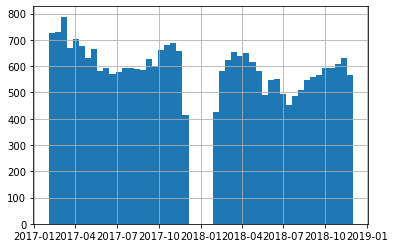

In [31]:
index_visits.date.hist(bins=50)

In order to find the ECG record that best matches the index visit, I join all the index visits with the ecg records and calculate the time difference. We should then be able to select the record that is closest in time. Only question really is _how_ close we need the ECG record to be. What if we have an ECG record from half an hour before, but nothing after. Does that count?

I consulted Jakob Forberg and he suggested to take the first ECG that occurs within 2 hours after ED admittance, or if there is no such ECG, take the last ECG within 1 hour before admittance, and if no such ECG exists, we discard that visit.

In [34]:
ed = index_visits.drop_duplicates(subset=['Alias'], keep='first').set_index('Alias')
ecgs = ecg_alias.rename_axis('ecg_index').reset_index().set_index('alias')
ed = ed.join(ecgs, how='left')
ed = ed.dropna(subset=['ecg_date'])
ed = ed.sort_values(by=['KontaktId', 'ecg_date'])
ed['dt'] = (ed.ecg_date - ed.date).dt.total_seconds()

### Trying to select a time window

In [40]:
ed[(ed.dt > -24 * 3600) & (ed.dt < 24 * 3600)].drop_duplicates(subset=['KontaktId'], keep='first')

,KontaktId,VardtillfalleAlias,Process_text,UppföljningParameter_text,AktuellSjukhusId,Sjukhus_KortNamn,Sjukhus_Namn,BesokOrsakId,BesokOrsak_Kod,BesokOrsak_Beskrivning,...,Charlson comorbidity index,Avliden,Dödsdatum,DödsdatumSomSträng,RiksHIA_STEMI,RiksHIA_Admission_ER_DATE_TIME,date,ecg_index,ecg_date,dt
{B2122C7D-35F2-4D8A-A9D4-EF709EF6E92C},K10000001,VT0018478,Provtagning,NaN,SE162321000255-O10532,CSK,Centralsjukhuset Kristianstad,120.0,BröstSm,"Bröstsmärta/Bröstkorgssmärta UNS RETTS-A 5, Re...",...,3.0,False,NaN,NaN,False,NaN,2017-02-01 00:03:00,112227.0,2017-02-01 00:21:03,1083.0
{74707EA3-AE3C-4925-A80F-1D0395830A82},K10000002,VT0003646,VR,NaN,SE162321000255-O11414,SUSMa,SUS Malmö,120.0,BröstSm,"Bröstsmärta/Bröstkorgssmärta UNS RETTS-A 5, Re...",...,NaN,False,NaN,NaN,False,NaN,2017-02-01 00:47:00,189325.0,2017-02-01 01:06:48,1188.0
{D095F9B9-45C4-4B3F-975F-AA80AEEDD1FD},K10000003,VT0002448,Team 3,Ambulans,O10001,SUSLu,SUS Lund,120.0,BröstSm,"Bröstsmärta/Bröstkorgssmärta UNS RETTS-A 5, Re...",...,NaN,False,NaN,NaN,False,NaN,2017-02-01 01:38:00,518789.0,2017-02-01 01:09:28,-1712.0
{76D32F25-6B4C-4367-AFBE-47AC6C1C27F2},K10000004,VT0017985,Triage,Ambulans,SE162321000255-O11414,SUSMa,SUS Malmö,120.0,BröstSm,"Bröstsmärta/Bröstkorgssmärta UNS RETTS-A 5, Re...",...,1.0,False,NaN,NaN,False,NaN,2017-02-01 03:55:00,286717.0,2017-02-01 03:22:28,-1952.0
{31603ACF-E64C-4F38-8C37-5CD30974E3A9},K10000005,VT0019721,Nr.lapp-reg,NaN,SE162321000255-O12014,HBG,Helsingborgs lasarett,120.0,BröstSm,"Bröstsmärta/Bröstkorgssmärta UNS RETTS-A 5, Re...",...,NaN,False,NaN,NaN,False,NaN,2017-02-01 04:57:00,162588.0,2017-02-01 05:07:15,615.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
{2ECB0472-0A6C-4C6D-BC5F-FBB265D86DBE},K10027555,VT0004372,LARM,Ambulans,O10001,SUSLu,SUS Lund,120.0,BröstSm,"Bröstsmärta/Bröstkorgssmärta UNS RETTS-A 5, Re...",...,NaN,False,NaN,NaN,False,NaN,2018-11-30 23:08:00,356759.0,2018-11-30 22:43:23,-1477.0
{F738B7B7-9718-422E-B27F-A8AEAEB8C561},K10027556,VT0006394,FÖRTUR,NaN,SE162321000255-O11414,SUSMa,SUS Malmö,120.0,BröstSm,"Bröstsmärta/Bröstkorgssmärta UNS RETTS-A 5, Re...",...,NaN,False,NaN,NaN,False,NaN,2018-11-30 23:11:00,434685.0,2018-11-30 23:40:11,1751.0
{85559731-8D42-4282-919D-9BFB00E0D68B},K10027557,VT0019998,-,NaN,SE162321000255-O12014,HBG,Helsingborgs lasarett,120.0,BröstSm,"Bröstsmärta/Bröstkorgssmärta UNS RETTS-A 5, Re...",...,NaN,False,NaN,NaN,False,NaN,2018-11-30 23:26:00,96481.0,2018-11-30 23:44:29,1109.0
{4F5A81AD-66D6-4873-A33A-D422CA8BF584},K10027558,VT0021084,NaN,Ambulans,SE162321000255-O12014,HBG,Helsingborgs lasarett,120.0,BröstSm,"Bröstsmärta/Bröstkorgssmärta UNS RETTS-A 5, Re...",...,NaN,False,NaN,NaN,False,NaN,2018-11-30 23:34:00,73768.0,2018-11-30 23:11:12,-1368.0


In [131]:
for h in range(1, 25):
    print(h, len(ed[(ed.dt > -h * 3600) & (ed.dt < h * 3600)].drop_duplicates(subset=['KontaktId'], keep='first')))

1 23247
2 26025
3 26409
4 26469
5 26491
6 26510
7 26517
8 26525
9 26529
10 26531
11 26533
12 26536
13 26537
14 26538
15 26540
16 26541
17 26542
18 26543
19 26544
20 26546
21 26547
22 26549
23 26551
24 26552


In [78]:
len(ed[(ed.dt > -1 * 3600) & (ed.dt < 0)].drop_duplicates(subset=['KontaktId'], keep='first'))

10148

In [79]:
len(ed[(ed.dt > 0) & (ed.dt < 3600)].drop_duplicates(subset=['KontaktId'], keep='first'))

20293

In [130]:
len(ed[(ed.dt > 0) & (ed.dt < 6*3600)].drop_duplicates(subset=['KontaktId'], keep='first'))

24406

In [157]:
len(ed[(ed.dt > -3600) & (ed.dt < 2*3600)].drop_duplicates(subset=['KontaktId'], keep='first'))

25778

In [158]:
len(ed[(ed.dt > -3600) & (ed.dt < 3*3600)].drop_duplicates(subset=['KontaktId'], keep='first'))

26131

In [194]:
after_admittance = ed[(ed.dt > 0) & (ed.dt < 2*3600)].drop_duplicates(subset=['KontaktId'], keep='first')
before_admittance = ed[(ed.dt > -3600) & (ed.dt < 0)].drop_duplicates(subset=['KontaktId'], keep='last')

In [197]:
after_admittance.shape

(23546, 38)

In [198]:
before_admittance.shape

(10148, 38)

In [203]:
combined_ed = pd.concat([after_admittance, before_admittance], axis=0)
combined_ed.sort_values(by=['KontaktId', 'ecg_date']).drop_duplicates(subset=['KontaktId'], keep='last')

,KontaktId,VardtillfalleAlias,Process_text,UppföljningParameter_text,AktuellSjukhusId,Sjukhus_KortNamn,Sjukhus_Namn,BesokOrsakId,BesokOrsak_Kod,BesokOrsak_Beskrivning,...,Charlson comorbidity index,Avliden,Dödsdatum,DödsdatumSomSträng,RiksHIA_STEMI,RiksHIA_Admission_ER_DATE_TIME,date,ecg_index,ecg_date,dt
{B2122C7D-35F2-4D8A-A9D4-EF709EF6E92C},K10000001,VT0018478,Provtagning,NaN,SE162321000255-O10532,CSK,Centralsjukhuset Kristianstad,120.0,BröstSm,"Bröstsmärta/Bröstkorgssmärta UNS RETTS-A 5, Re...",...,3.0,False,NaN,NaN,False,NaN,2017-02-01 00:03:00,112227.0,2017-02-01 00:21:03,1083.0
{74707EA3-AE3C-4925-A80F-1D0395830A82},K10000002,VT0003646,VR,NaN,SE162321000255-O11414,SUSMa,SUS Malmö,120.0,BröstSm,"Bröstsmärta/Bröstkorgssmärta UNS RETTS-A 5, Re...",...,NaN,False,NaN,NaN,False,NaN,2017-02-01 00:47:00,189325.0,2017-02-01 01:06:48,1188.0
{D095F9B9-45C4-4B3F-975F-AA80AEEDD1FD},K10000003,VT0002448,Team 3,Ambulans,O10001,SUSLu,SUS Lund,120.0,BröstSm,"Bröstsmärta/Bröstkorgssmärta UNS RETTS-A 5, Re...",...,NaN,False,NaN,NaN,False,NaN,2017-02-01 01:38:00,518789.0,2017-02-01 01:09:28,-1712.0
{76D32F25-6B4C-4367-AFBE-47AC6C1C27F2},K10000004,VT0017985,Triage,Ambulans,SE162321000255-O11414,SUSMa,SUS Malmö,120.0,BröstSm,"Bröstsmärta/Bröstkorgssmärta UNS RETTS-A 5, Re...",...,1.0,False,NaN,NaN,False,NaN,2017-02-01 03:55:00,286718.0,2017-02-01 04:17:03,1323.0
{31603ACF-E64C-4F38-8C37-5CD30974E3A9},K10000005,VT0019721,Nr.lapp-reg,NaN,SE162321000255-O12014,HBG,Helsingborgs lasarett,120.0,BröstSm,"Bröstsmärta/Bröstkorgssmärta UNS RETTS-A 5, Re...",...,NaN,False,NaN,NaN,False,NaN,2017-02-01 04:57:00,162588.0,2017-02-01 05:07:15,615.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
{2ECB0472-0A6C-4C6D-BC5F-FBB265D86DBE},K10027555,VT0004372,LARM,Ambulans,O10001,SUSLu,SUS Lund,120.0,BröstSm,"Bröstsmärta/Bröstkorgssmärta UNS RETTS-A 5, Re...",...,NaN,False,NaN,NaN,False,NaN,2018-11-30 23:08:00,356760.0,2018-11-30 23:30:56,1376.0
{F738B7B7-9718-422E-B27F-A8AEAEB8C561},K10027556,VT0006394,FÖRTUR,NaN,SE162321000255-O11414,SUSMa,SUS Malmö,120.0,BröstSm,"Bröstsmärta/Bröstkorgssmärta UNS RETTS-A 5, Re...",...,NaN,False,NaN,NaN,False,NaN,2018-11-30 23:11:00,434685.0,2018-11-30 23:40:11,1751.0
{85559731-8D42-4282-919D-9BFB00E0D68B},K10027557,VT0019998,-,NaN,SE162321000255-O12014,HBG,Helsingborgs lasarett,120.0,BröstSm,"Bröstsmärta/Bröstkorgssmärta UNS RETTS-A 5, Re...",...,NaN,False,NaN,NaN,False,NaN,2018-11-30 23:26:00,96481.0,2018-11-30 23:44:29,1109.0
{4F5A81AD-66D6-4873-A33A-D422CA8BF584},K10027558,VT0021084,NaN,Ambulans,SE162321000255-O12014,HBG,Helsingborgs lasarett,120.0,BröstSm,"Bröstsmärta/Bröstkorgssmärta UNS RETTS-A 5, Re...",...,NaN,False,NaN,NaN,False,NaN,2018-11-30 23:34:00,73769.0,2018-12-01 00:13:18,2358.0


In [81]:
ed.loc[(ed.dt > -3600) & (ed.dt < 3600), ['KontaktId', 'date', 'ecg_date', 'dt', 'ecg_index']]

,KontaktId,date,ecg_date,dt,ecg_index
{B2122C7D-35F2-4D8A-A9D4-EF709EF6E92C},K10000001,2017-02-01 00:03:00,2017-02-01 00:21:03,1083.0,112227.0
{74707EA3-AE3C-4925-A80F-1D0395830A82},K10000002,2017-02-01 00:47:00,2017-02-01 01:06:48,1188.0,189325.0
{D095F9B9-45C4-4B3F-975F-AA80AEEDD1FD},K10000003,2017-02-01 01:38:00,2017-02-01 01:09:28,-1712.0,518789.0
{76D32F25-6B4C-4367-AFBE-47AC6C1C27F2},K10000004,2017-02-01 03:55:00,2017-02-01 03:22:28,-1952.0,286717.0
{76D32F25-6B4C-4367-AFBE-47AC6C1C27F2},K10000004,2017-02-01 03:55:00,2017-02-01 04:17:03,1323.0,286718.0
...,...,...,...,...,...
{2ECB0472-0A6C-4C6D-BC5F-FBB265D86DBE},K10027555,2018-11-30 23:08:00,2018-11-30 23:30:56,1376.0,356760.0
{F738B7B7-9718-422E-B27F-A8AEAEB8C561},K10027556,2018-11-30 23:11:00,2018-11-30 23:40:11,1751.0,434685.0
{85559731-8D42-4282-919D-9BFB00E0D68B},K10027557,2018-11-30 23:26:00,2018-11-30 23:44:29,1109.0,96481.0
{4F5A81AD-66D6-4873-A33A-D422CA8BF584},K10027558,2018-11-30 23:34:00,2018-11-30 23:11:12,-1368.0,73768.0


### Looking at specific patients

In [84]:
ed.loc['{D095F9B9-45C4-4B3F-975F-AA80AEEDD1FD}']

,KontaktId,VardtillfalleAlias,Process_text,UppföljningParameter_text,AktuellSjukhusId,Sjukhus_KortNamn,Sjukhus_Namn,BesokOrsakId,BesokOrsak_Kod,BesokOrsak_Beskrivning,...,Charlson comorbidity index,Avliden,Dödsdatum,DödsdatumSomSträng,RiksHIA_STEMI,RiksHIA_Admission_ER_DATE_TIME,date,ecg_index,ecg_date,dt
{D095F9B9-45C4-4B3F-975F-AA80AEEDD1FD},K10000003,VT0002448,Team 3,Ambulans,O10001,SUSLu,SUS Lund,120.0,BröstSm,"Bröstsmärta/Bröstkorgssmärta UNS RETTS-A 5, Re...",...,NaN,False,NaN,NaN,False,NaN,2017-02-01 01:38:00,518789.0,2017-02-01 01:09:28,-1712.0
{D095F9B9-45C4-4B3F-975F-AA80AEEDD1FD},K10000003,VT0002448,Team 3,Ambulans,O10001,SUSLu,SUS Lund,120.0,BröstSm,"Bröstsmärta/Bröstkorgssmärta UNS RETTS-A 5, Re...",...,NaN,False,NaN,NaN,False,NaN,2017-02-01 01:38:00,518790.0,2019-05-13 14:31:01,71844781.0


In [99]:
def print_diagnoses_for_patient(patient):
    print("Before")
    display(diagnoses_before.loc[
        diagnoses_before.Alias == patient, 
        ['PatientDiagnos_Kod', 'PatientDiagnos_Beskrivning', 'PatientDiagnos_ModifieradDatum']
    ].sort_values(by='PatientDiagnos_ModifieradDatum'))
    print("Current")
    display(diagnoses_current.loc[
        diagnoses_current.Alias == patient,
        ['PatientDiagnos_Kod', 'PatientDiagnos_Beskrivning', 'PatientDiagnos_ModifieradDatum']
    ].sort_values(by='PatientDiagnos_ModifieradDatum'))
    print("After")
    display(diagnoses_after.loc[
        diagnoses_after.Alias == patient,
        ['PatientDiagnos_Kod', 'PatientDiagnos_Beskrivning', 'PatientDiagnos_ModifieradDatum']
    ].sort_values(by='PatientDiagnos_ModifieradDatum'))

In [100]:
print_diagnoses_for_patient('{D095F9B9-45C4-4B3F-975F-AA80AEEDD1FD}')

Before


,PatientDiagnos_Kod,PatientDiagnos_Beskrivning,PatientDiagnos_ModifieradDatum
267562,L059,Pilonidalcysta utan abscess,2013-07-03 12:51:50.0000000
258336,Z090,Kontrollundersökning efter kirurgi för andra t...,2013-07-19 22:49:34.0000000
263625,Z038,Observation för andra misstänkta sjukdomar och...,2013-07-19 22:49:34.0000000
270209,L059,Pilonidalcysta utan abscess,2013-08-08 20:41:20.0000000
263131,Z038,Observation för andra misstänkta sjukdomar och...,2013-08-19 14:06:38.0000000
398107,L059,Pilonidalcysta utan abscess,2013-09-03 07:53:42.0000000
267697,L739,"Follikulära sjukdom, ospecificerad",2014-11-11 14:15:25.0000000
268363,W1999,"Fall, ospecificerat-plats, ospecificerad-aktiv...",2015-05-28 14:45:13.0000000
270210,S134,Distorsion i halskotpelaren,2015-05-28 14:45:13.0000000
270211,G409,"Epilepsi, ospecificerad",2015-10-01 14:14:11.0000000


Current


,PatientDiagnos_Kod,PatientDiagnos_Beskrivning,PatientDiagnos_ModifieradDatum
6003,R074,"Bröstsmärtor, ospecificerade",2017-03-15 15:20:01.0000000


After


,PatientDiagnos_Kod,PatientDiagnos_Beskrivning,PatientDiagnos_ModifieradDatum


In [109]:
print_diagnoses_for_patient('{4F5A81AD-66D6-4873-A33A-D422CA8BF584}')

Before


,PatientDiagnos_Kod,PatientDiagnos_Beskrivning,PatientDiagnos_ModifieradDatum


Current


,PatientDiagnos_Kod,PatientDiagnos_Beskrivning,PatientDiagnos_ModifieradDatum
63922,R074,"Bröstsmärtor, ospecificerade",2018-12-01 04:09:55.0000000
63923,R074,"Bröstsmärtor, ospecificerade",2018-12-02 14:52:12.0000000
63924,I340,Mitralisinsufficiens,2018-12-04 15:00:45.0000000
63925,I109,Essentiell hypertoni (högt blodtryck utan känd...,2018-12-04 15:00:45.0000000
63926,I351,Aortainsufficiens,2018-12-04 15:00:45.0000000


After


,PatientDiagnos_Kod,PatientDiagnos_Beskrivning,PatientDiagnos_ModifieradDatum


### Plotting some ECGs

In [108]:
ed.loc[ed.KontaktId == 'K10000006', ['date', 'ecg_date', 'dt', 'ecg_index']].iloc[-20:]

,date,ecg_date,dt,ecg_index
{1B0B3CE8-4215-4C99-AD4C-D7B9C43BF02E},2017-02-01 05:20:00,2014-10-06 08:56:29,-73340611.0,448330.0
{1B0B3CE8-4215-4C99-AD4C-D7B9C43BF02E},2017-02-01 05:20:00,2014-10-06 10:00:19,-73336781.0,448331.0
{1B0B3CE8-4215-4C99-AD4C-D7B9C43BF02E},2017-02-01 05:20:00,2015-07-15 06:23:04,-48985016.0,448332.0
{1B0B3CE8-4215-4C99-AD4C-D7B9C43BF02E},2017-02-01 05:20:00,2015-07-15 07:25:14,-48981286.0,448333.0
{1B0B3CE8-4215-4C99-AD4C-D7B9C43BF02E},2017-02-01 05:20:00,2015-07-15 07:25:41,-48981259.0,448334.0
{1B0B3CE8-4215-4C99-AD4C-D7B9C43BF02E},2017-02-01 05:20:00,2016-01-18 14:11:49,-32800091.0,448335.0
{1B0B3CE8-4215-4C99-AD4C-D7B9C43BF02E},2017-02-01 05:20:00,2016-06-01 08:48:06,-21155514.0,448336.0
{1B0B3CE8-4215-4C99-AD4C-D7B9C43BF02E},2017-02-01 05:20:00,2016-06-01 09:29:50,-21153010.0,448337.0
{1B0B3CE8-4215-4C99-AD4C-D7B9C43BF02E},2017-02-01 05:20:00,2016-09-07 11:00:54,-12680346.0,448338.0
{1B0B3CE8-4215-4C99-AD4C-D7B9C43BF02E},2017-02-01 05:20:00,2016-11-26 21:15:50,-5731450.0,448339.0


In [132]:
print_diagnoses_for_patient('{1B0B3CE8-4215-4C99-AD4C-D7B9C43BF02E}')

Before


,PatientDiagnos_Kod,PatientDiagnos_Beskrivning,PatientDiagnos_ModifieradDatum
469119,I509,"Hjärtinsufficiens, ospecificerad",2013-12-19 13:56:21.0000000
459552,J459,"Astma, ospecificerad",2013-12-19 13:56:21.0000000
471715,H549,Ospecificerad synnedsättning (i båda ögonen),2013-12-19 13:56:21.0000000
368841,I214,Akut subendokardiell infarkt,2013-12-19 13:56:21.0000000
471829,I259,"Kronisk ischemisk hjärtsjukdom, ospecificerad",2013-12-19 13:56:21.0000000
...,...,...,...
459556,J459,"Astma, ospecificerad",2016-11-30 14:46:30.0000000
363443,I509,"Hjärtinsufficiens, ospecificerad",2016-11-30 14:46:30.0000000
371937,I252,Gammal hjärtinfarkt,2016-11-30 14:46:30.0000000
371938,I259,"Kronisk ischemisk hjärtsjukdom, ospecificerad",2016-11-30 14:46:30.0000000


Current


,PatientDiagnos_Kod,PatientDiagnos_Beskrivning,PatientDiagnos_ModifieradDatum
9670,Z039,Observation för ospecificerad misstänkt sjukdo...,2017-02-01 07:38:18.0000000
9671,I214,Akut subendokardiell infarkt,2017-02-07 14:49:46.0000000
9672,I509,"Hjärtinsufficiens, ospecificerad",2017-02-07 14:49:46.0000000
9673,I259,"Kronisk ischemisk hjärtsjukdom, ospecificerad",2017-02-07 14:49:46.0000000
9674,I252,Gammal hjärtinfarkt,2017-02-07 14:49:46.0000000
9675,Z867C,Cerebral insult utan bestående men i den egna ...,2017-02-07 14:49:46.0000000
9676,Z966F,Förekomst av ortopediskt ledimplantat i höftled,2017-02-07 14:49:46.0000000
9677,J459,"Astma, ospecificerad",2017-02-07 14:49:46.0000000


After


,PatientDiagnos_Kod,PatientDiagnos_Beskrivning,PatientDiagnos_ModifieradDatum
309,I509,"Hjärtinsufficiens, ospecificerad",2017-03-01 09:35:04.0000000


In [57]:
def add_missing_cols(ecg):
    i = ecg[:, 6]
    ii = ecg[:, 7]
    iii = ii - i
    aVR = -(i + ii) / 2
    aVF = (ii + iii) / 2
    aVL = (i - iii) / 2
    missing = np.column_stack((iii, aVR, aVL, aVF))
    return np.hstack((ecg, missing))

In [75]:
def plot_ecg_index(index):
    signal = add_missing_cols(ecg['raw'][index])
    signal = 1000 * signal.T
    ecg_plot.plot(
        signal,
        sample_rate=1000, 
        lead_index=["V1", "V2", "V3", "V4", "V5", "V6", "I", "II", "III", "aVR", "aVL", "aVF"],
        lead_order=[6, 7, 8, 9, 10, 11, 0, 1, 2, 3, 4, 5],
        columns=2,
        title=f"{index} - {ecg['meta']['date'][index]}",
    )

In [133]:
%matplotlib notebook

<IPython.core.display.Javascript object>


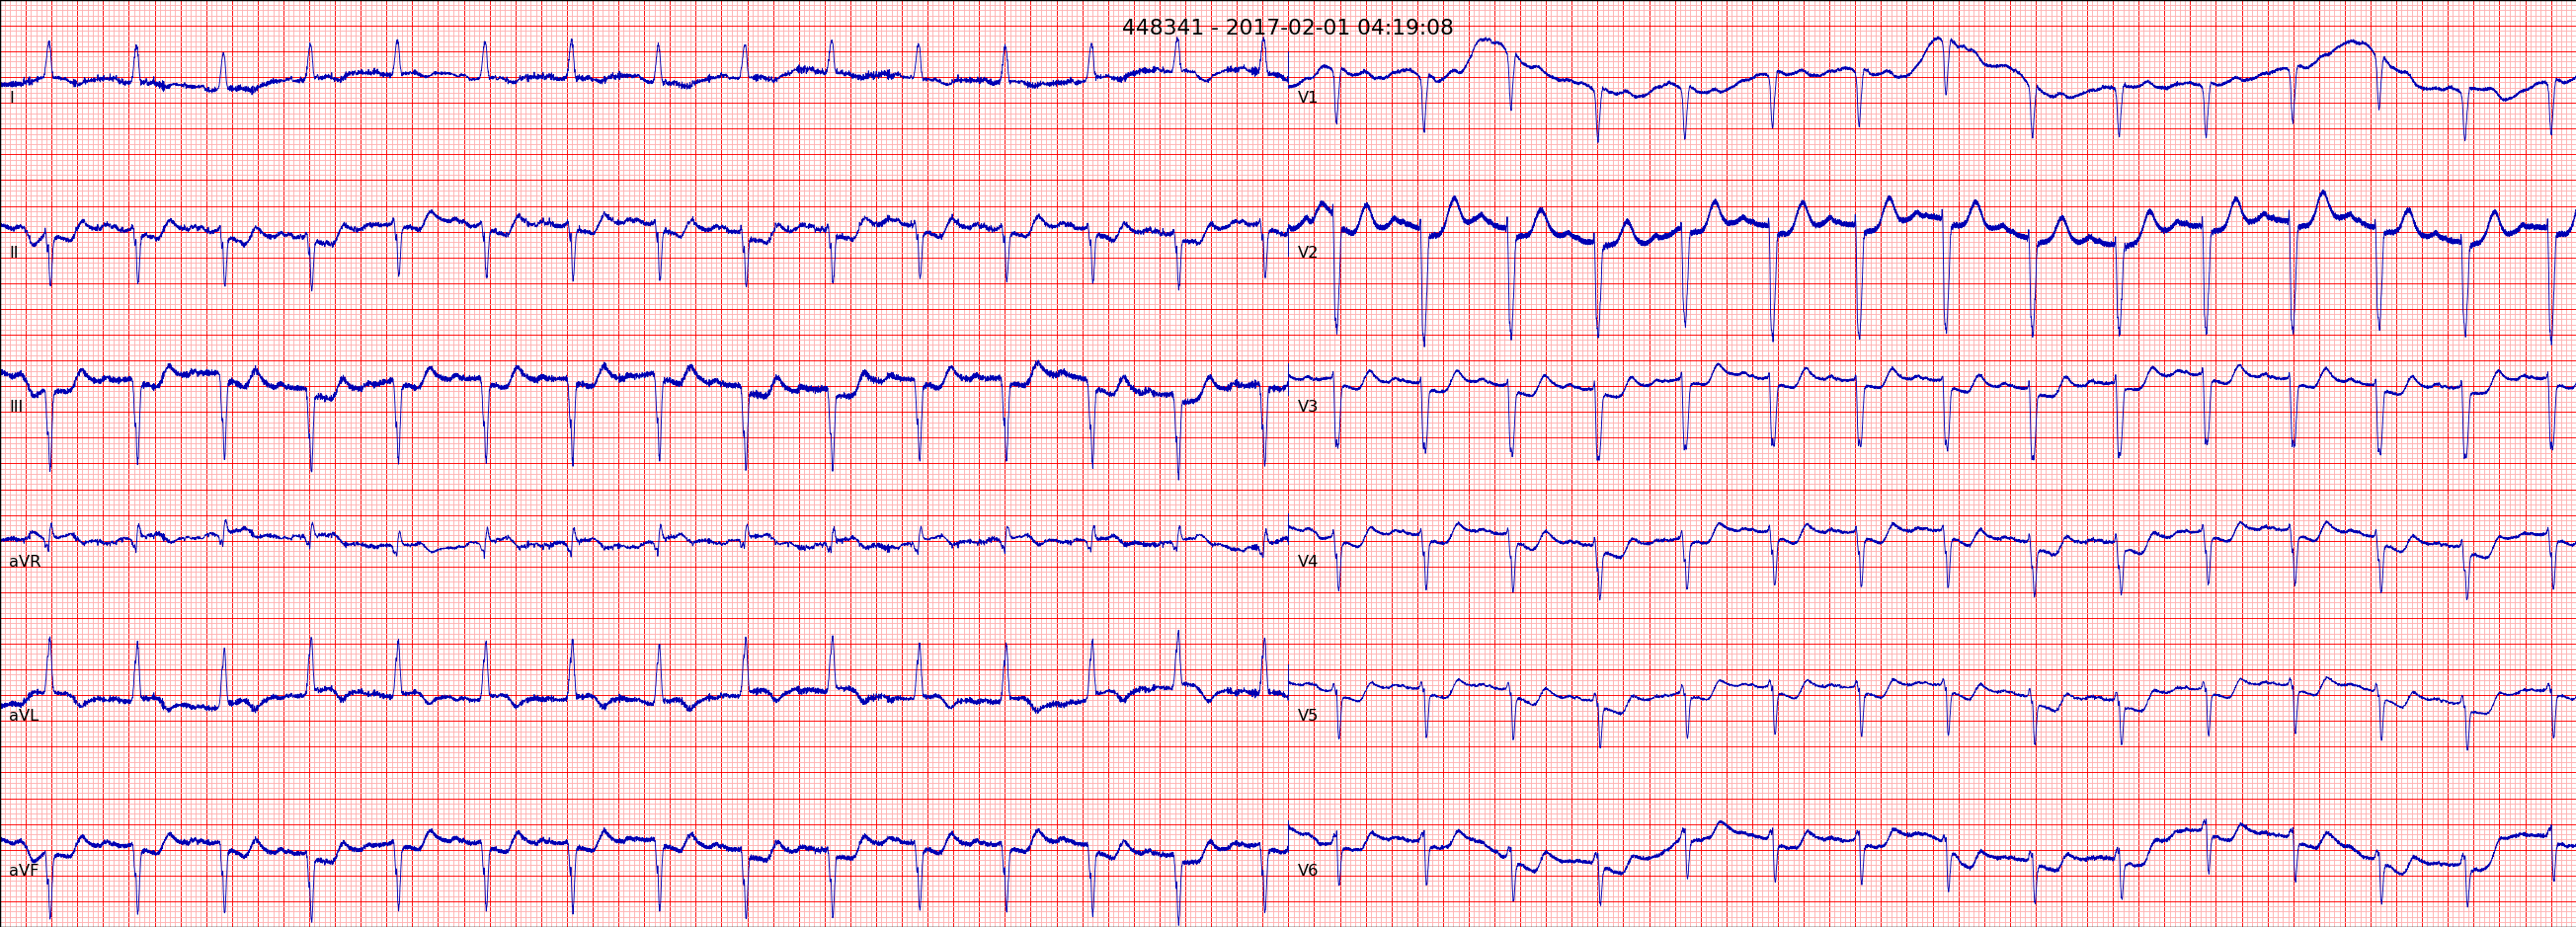

In [134]:
plot_ecg_index(448341)

<IPython.core.display.Javascript object>


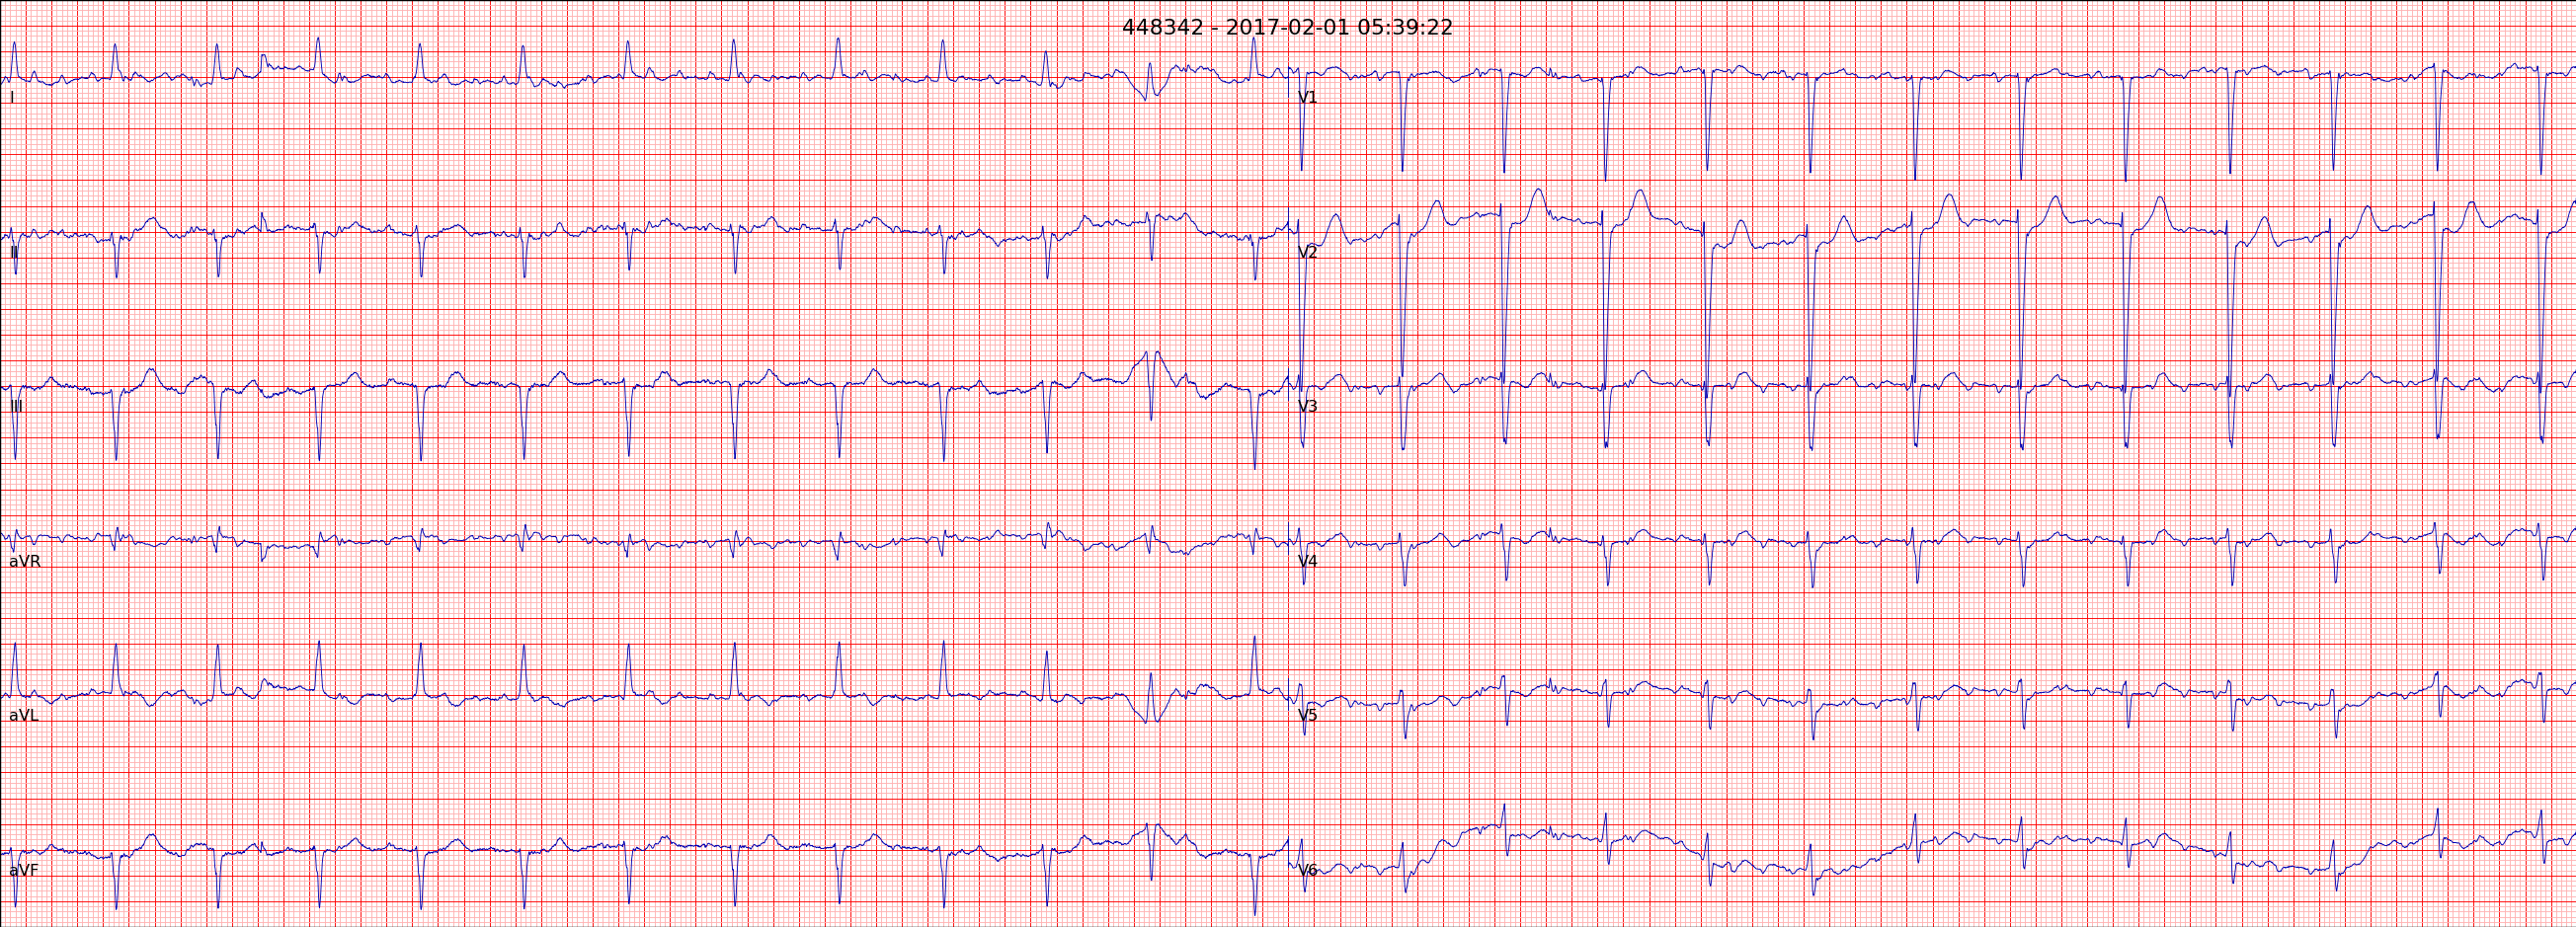

In [135]:
plot_ecg_index(448342)

## Distribution of ECGs
I'm curious about how many ECGs each patient actually has.

In [116]:
ecg_alias

,alias,ecg_date
0,{0000C50B-0BB5-489B-89E6-4F3CCFFB3C73},2018-05-03 11:06:09
1,{0000C50B-0BB5-489B-89E6-4F3CCFFB3C73},2018-05-03 11:07:05
2,{0000C50B-0BB5-489B-89E6-4F3CCFFB3C73},2018-05-29 13:53:02
3,{0000C50B-0BB5-489B-89E6-4F3CCFFB3C73},2018-05-29 13:54:40
4,{000FBD22-3E32-4B73-B37B-C8E3475379FB},2017-09-30 10:29:39
...,...,...
536130,{FFFACA99-6D7D-459A-A693-7693FD7A5AFB},2018-06-20 13:36:47
536131,{FFFACA99-6D7D-459A-A693-7693FD7A5AFB},2018-09-17 08:20:24
536132,{FFFACA99-6D7D-459A-A693-7693FD7A5AFB},2019-03-05 16:43:59
536133,{FFFACA99-6D7D-459A-A693-7693FD7A5AFB},2019-03-05 16:51:06


In [113]:
%matplotlib inline

In [125]:
ecgs_per_patient = ecg_alias.alias.value_counts()
ecgs_per_patient

{DF729AD6-A10B-4D03-B1AA-83D547128347}    293
{D372A586-4F58-4E86-84F5-887916D3AE47}    273
{B767668C-1065-4008-98FF-668A9BCB769F}    265
{E33CE297-326E-49D9-BCEC-4D611BC0FAC2}    264
{61C0F8D5-F8EB-48BE-B9B2-3BBE565BD5B9}    259
                                         ... 
{3BC12D18-C5D7-4ABC-8ECF-B2C181757C48}      1
{42382EC0-DCF2-4235-8FCC-5219266ACBB6}      1
{EADC802B-B736-42E9-8A5D-B4ED05CA32D2}      1
{FF65EB61-9ABA-4166-B4BD-58043DE398C2}      1
{D86474DD-AE49-42E7-99F8-1948941038F5}      1
Name: alias, Length: 29792, dtype: int64

<AxesSubplot:>

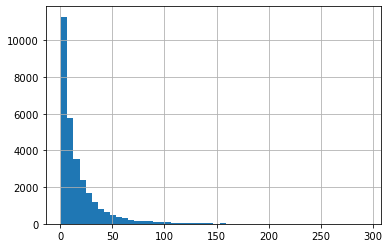

In [126]:
ecgs_per_patient.hist(bins=50)

In [127]:
ecgs_per_patient.describe()

count    29792.000000
mean        17.995939
std         23.708731
min          1.000000
25%          4.000000
50%         10.000000
75%         23.000000
max        293.000000
Name: alias, dtype: float64

In [128]:
ecgs_per_patient.median()

10.0

In [129]:
ecgs_per_patient[ecgs_per_patient == 1]

{1E4B2193-DB19-4167-8463-869AA92436E3}    1
{DDD719DB-7D7E-42AE-87DA-E19021DCC9C1}    1
{1EEB678B-D5D3-4AA2-AED5-E618ED4C31DC}    1
{24C7B4C3-290B-4E95-B2CF-384ED243E04A}    1
{35868D0F-88E1-48B2-8B76-A451A9937321}    1
                                         ..
{3BC12D18-C5D7-4ABC-8ECF-B2C181757C48}    1
{42382EC0-DCF2-4235-8FCC-5219266ACBB6}    1
{EADC802B-B736-42E9-8A5D-B4ED05CA32D2}    1
{FF65EB61-9ABA-4166-B4BD-58043DE398C2}    1
{D86474DD-AE49-42E7-99F8-1948941038F5}    1
Name: alias, Length: 2275, dtype: int64

## In search of ECG quality

In [138]:
import scipy.io as sio

In [139]:
m = sio.loadmat(ecg['meta']['path'][448342])

In [154]:
m

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: l\xc3\xb6r nov 14 20:02:57 2020',
 '__version__': '1.0',
 '__globals__': [],
 'Patient': array([[(array(['1b0b3ce8-4215-4c99-ad4c-d7b9c43bf02e'], dtype='<U36'), array([], dtype='<U1'), array([], dtype='<U1'), array(['Female'], dtype='<U6'), array([[100]], dtype=uint8))]],
       dtype=[('ID', 'O'), ('Last_name', 'O'), ('First_name', 'O'), ('Sex', 'O'), ('Age', 'O')]),
 'Recording': array([[(array(['01-Feb-2017 05:39:22'], dtype='<U20'), array(['MAC55'], dtype='<U5'), array(['12-lead ECG'], dtype='<U11'))]],
       dtype=[('Date', 'O'), ('Device', 'O'), ('Lead_system', 'O')]),
 'Data': array([[(array([[1.66005859e-04, 4.39427273e-05, 5.37077778e-05, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [1.88136782e-04, 5.07024357e-05, 6.12507495e-05, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [1.66005859e-04, 4.39427273e-05, 5.37077778e-05, ...,
         0.00000000e+00, 0.00

In [152]:
sio.loadmat(ecg['meta']['path'][448346])['Measurements']['H']

array([[array([[array(['*** CONSIDER ACUTE STEMI ***'], dtype='<U28')]],
      dtype=object)]], dtype=object)